In [30]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

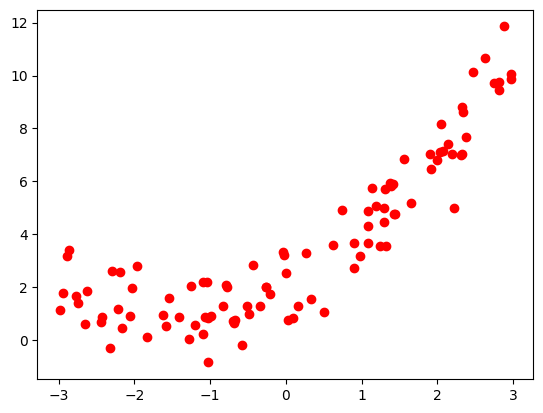

In [31]:
#creating a dataset that mimics polynomial graph

X=6*np.random.rand(100,1)-3
Y=0.5* X**2 + 1.5*X + 2 + np.random.randn(100,1)
#quadratic equation 
plt.scatter(X,Y, color='r')


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


0.6172456298870961


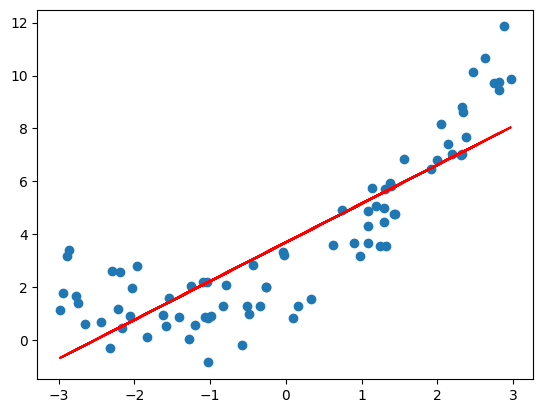

In [33]:
from sklearn.metrics import r2_score
score=r2_score(Y_test, regression.predict(X_test))
plt.plot(X_train, regression.predict(X_train), color='r')
plt.scatter(X_train, Y_train)

#this is linear regression and accuracy is really bad so next will be polynomial regession

print(score)

In [34]:
#polynomial transformation 

from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2, include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [35]:
from sklearn.metrics import r2_score
regression2=LinearRegression()
regression2.fit(X_train_poly, Y_train)
Y_pred2=regression2.predict(X_test_poly)
score2=r2_score(Y_test, Y_pred2)
print(score2)

0.8697843538775949


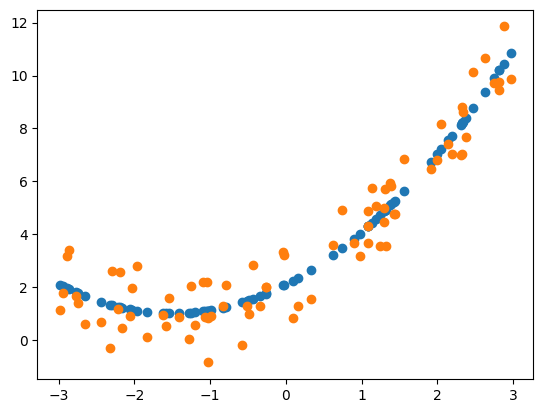

In [36]:
plt.scatter(X_train, regression2.predict(X_train_poly))
plt.scatter(X_train, Y_train)


0.870050447651743


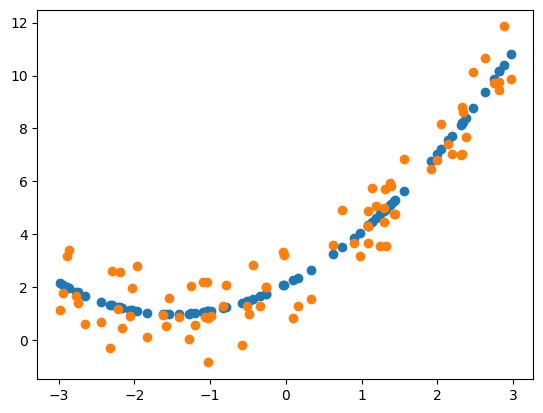

In [37]:
#polynomial transformation 

#this is worse in our case as previous was 73 this is 70 but if this was more then keep increasing or decreasing degree to find best

from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3, include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)
from sklearn.metrics import r2_score
regression2=LinearRegression()
regression2.fit(X_train_poly, Y_train)
Y_pred2=regression2.predict(X_test_poly)
score2=r2_score(Y_test, Y_pred2)
print(score2)
plt.scatter(X_train, regression2.predict(X_train_poly))
plt.scatter(X_train, Y_train)

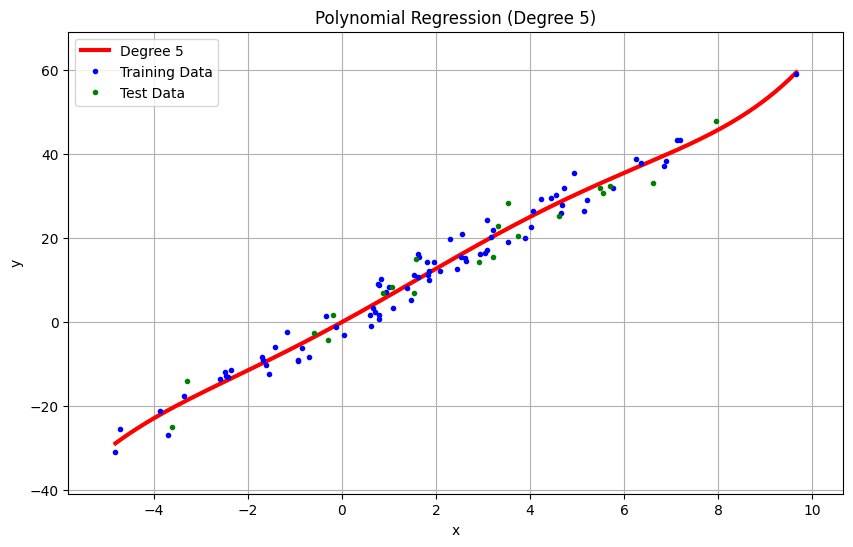

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

def polynomial_regression_with_plot(degree):
    # Sample data generation
    np.random.seed(0)
    X = 2 - 3 * np.random.normal(0, 1, 100)
    y = X*3 + X*2 + X + np.random.normal(0, 3, 100)
    X = X.reshape(-1, 1)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Pipeline with polynomial regression
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    lin_reg = LinearRegression()
    poly_regression = Pipeline([
        ("poly_features", poly_features),
        ("lin_reg", lin_reg)
    ])

    # Fit model
    poly_regression.fit(X_train, y_train)

    # Generate predictions
    x_new = np.linspace(X.min(), X.max(), 200).reshape(200, 1)
    y_pred_new = poly_regression.predict(x_new)

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(x_new, y_pred_new, 'r-', label=f"Degree {degree}", linewidth=3)
    plt.plot(X_train, y_train, 'b.', label="Training Data", linewidth=3)
    plt.plot(X_test, y_test, 'g.', label="Test Data", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Polynomial Regression (Degree {degree})")
    plt.axis([X.min()-1, X.max()+1, min(y)-10, max(y)+10])
    plt.grid(True)
    plt.show()

# Example usage
polynomial_regression_with_plot(10)